In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('StarClassificationDataset.csv')
df.head()

object_ID        alpha      delta  UV_filter  green_filter  red_filter  \
0  1.240000e+18  135.6891066  32.494632   23.87882      22.27530    20.39501   
1  1.240000e+18  144.8261006  31.274185   24.77759      22.83188    22.58444   
2  1.240000e+18  142.1887896  35.582444   25.26307      22.66389    20.60976   
3  1.240000e+18  338.7410378  -0.402828   22.13682      23.77656    21.61162   
4  1.240000e+18  345.2825932  21.183866   19.43718      17.58028    16.49747   

   near_IR_filter  IR_filter run_ID  rerun_ID  cam_col  field_ID  \
0        19.16573   18.79371   3606       301        2        79   
1        21.16812   21.61427   4518       301        5       119   
2        19.34857   18.94827   3606       301        2       120   
3        20.50454   19.25010   4192       301        3       214   
4        15.97711   15.54461    NaN       301        3       137   

    spec_obj_ID  red_shift  plate_ID    MJD  fiber_ID   class  
0  6.540000e+18   0.634794      5812  56354       171  GALAXY  
1  1.180000e+19   0.779136     10445  58158       427  GALAXY  
2  5.150000e+18   0.644195      4576  55592       299  GALAXY  
3  1.030000e+19   0.932346      9149  58039       775  GALAXY  
4  6.890000e+18   0.116123      6121  56187       842  GALAXY

In [4]:
df.shape

(100000, 18)

# Question 1: Display stats and distributions for attributes.

In [5]:
df.isnull().sum()

object_ID         0
alpha             1
delta             2
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            6
rerun_ID          0
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

In [6]:
df = df.replace(r'^\s*$', float('nan'), regex=True).dropna()
df.isnull().sum()

object_ID         0
alpha             0
delta             0
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            0
rerun_ID          0
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

In [7]:
df.dtypes

object_ID         float64
alpha              object
delta             float64
UV_filter         float64
green_filter      float64
red_filter        float64
near_IR_filter    float64
IR_filter         float64
run_ID             object
rerun_ID            int64
cam_col             int64
field_ID            int64
spec_obj_ID       float64
red_shift         float64
plate_ID            int64
MJD                 int64
fiber_ID            int64
class              object
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])


In [9]:
# Handling special cases: converting alpha from object to float

df['alpha'] = df['alpha'].astype(float)
df.dtypes

object_ID         float64
alpha             float64
delta             float64
UV_filter         float64
green_filter      float64
red_filter        float64
near_IR_filter    float64
IR_filter         float64
run_ID             object
rerun_ID            int64
cam_col             int64
field_ID            int64
spec_obj_ID       float64
red_shift         float64
plate_ID            int64
MJD                 int64
fiber_ID            int64
class               int32
dtype: object

In [10]:
df = df.drop(['object_ID', 'run_ID'],axis=1)
df.reset_index(drop=True, inplace=True)
df

alpha      delta  UV_filter  green_filter  red_filter  \
0      135.689107  32.494632   23.87882      22.27530    20.39501   
1      144.826101  31.274185   24.77759      22.83188    22.58444   
2      142.188790  35.582444   25.26307      22.66389    20.60976   
3      338.741038  -0.402828   22.13682      23.77656    21.61162   
4      340.995120  20.589476   23.48827      23.33776    21.32195   
...           ...        ...        ...           ...         ...   
99984   39.620709  -2.594074   22.16759      22.97586    21.90404   
99985   29.493819  19.798874   22.69118      22.38628    20.45003   
99986  224.587407  15.700707   21.16916      19.26997    18.20428   
99987  212.268621  46.660365   25.35039      21.63757    19.91386   
99988  196.896053  49.464643   22.62171      21.79745    20.60115   

       near_IR_filter  IR_filter  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0            19.16573   18.79371       301        2        79  6.540000e+18   
1            21.16812   21.61427       301        5       119  1.180000e+19   
2            19.34857   18.94827       301        2       120  5.150000e+18   
3            20.50454   19.25010       301        3       214  1.030000e+19   
4            20.25615   19.54544       301        3       110  5.660000e+18   
...               ...        ...       ...      ...       ...           ...   
99984        21.30548   20.73569       301        2       581  1.060000e+19   
99985        19.75759   19.41526       301        1       289  8.590000e+18   
99986        17.69034   17.35221       301        4       308  3.110000e+18   
99987        19.07254   18.62482       301        4       131  7.600000e+18   
99988        20.00959   19.28075       301        4        60  8.340000e+18   

       red_shift  plate_ID    MJD  fiber_ID  class  
0       0.634794      5812  56354       171      0  
1       0.779136     10445  58158       427      0  
2       0.644195      4576  55592       299      0  
3       0.932346      9149  58039       775      0  
4       1.424659      5026  55855       741      1  
...          ...       ...    ...       ...    ...  
99984   0.000000      9374  57749       438      0  
99985   0.404895      7626  56934       866      0  
99986   0.143366      2764  54535        74      0  
99987   0.455040      6751  56368       470      0  
99988   0.542944      7410  57104       851      0  

[99989 rows x 16 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   alpha           99989 non-null  float64
 1   delta           99989 non-null  float64
 2   UV_filter       99989 non-null  float64
 3   green_filter    99989 non-null  float64
 4   red_filter      99989 non-null  float64
 5   near_IR_filter  99989 non-null  float64
 6   IR_filter       99989 non-null  float64
 7   rerun_ID        99989 non-null  int64  
 8   cam_col         99989 non-null  int64  
 9   field_ID        99989 non-null  int64  
 10  spec_obj_ID     99989 non-null  float64
 11  red_shift       99989 non-null  float64
 12  plate_ID        99989 non-null  int64  
 13  MJD             99989 non-null  int64  
 14  fiber_ID        99989 non-null  int64  
 15  class           99989 non-null  int32  
dtypes: float64(9), int32(1), int64(6)
memory usage: 11.8 MB


In [12]:

# 1. Statistical Analysis
print("\nStatistical Summary of Features:")
df.describe()


Statistical Summary of Features:


alpha         delta     UV_filter  green_filter    red_filter  \
count  99989.000000  99989.000000  99989.000000  99989.000000  99989.000000   
mean     177.622734     24.135449     21.980473     20.531376     19.645774   
std       96.501108     19.644584     31.771029     31.752030      1.854751   
min        0.005528    -18.785328  -9999.000000  -9999.000000      9.822070   
25%      127.515519      5.148131     20.352480     18.965250     18.136020   
50%      180.900527     23.646462     22.179130     21.099930     20.125310   
75%      233.888222     39.901647     23.687130     22.123740     21.044780   
max      359.999810     83.000519     32.781390     31.602240     29.571860   

       near_IR_filter     IR_filter  rerun_ID       cam_col      field_ID  \
count    99989.000000  99989.000000   99989.0  99989.000000  99989.000000   
mean        19.084869     18.668818     301.0      3.511626    186.129254   
std          1.757889     31.729891       0.0      1.586959    149.015897   
min          9.469903  -9999.000000     301.0      1.000000     11.000000   
25%         17.732400     17.460970     301.0      2.000000     82.000000   
50%         19.405150     19.004590     301.0      4.000000    146.000000   
75%         20.396480     19.921120     301.0      5.000000    241.000000   
max         32.141470     29.383740     301.0      6.000000    989.000000   

        spec_obj_ID     red_shift      plate_ID           MJD      fiber_ID  \
count  9.998900e+04  99989.000000  99989.000000  99989.000000  99989.000000   
mean   5.784029e+18      0.576663   5137.102581  55588.708128    449.303253   
std    3.323961e+18      0.730724   2952.262946   1808.446599    272.488582   
min    3.000000e+17     -0.009971    266.000000  51608.000000      1.000000   
25%    2.840000e+18      0.054507   2526.000000  54234.000000    221.000000   
50%    5.610000e+18      0.424176   4987.000000  55869.000000    433.000000   
75%    8.330000e+18      0.704137   7400.000000  56777.000000    645.000000   
max    1.410000e+19      7.011245  12547.000000  58932.000000   1000.000000   

              class  
count  99989.000000  
mean       0.621548  
std        0.816799  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        2.000000

In [13]:
# Calculate skewness and identify features requiring treatment
print("\nSkewness Analysis:")
skewness = df.skew()
print("\nFeatures with high skewness (|skew| > 1):")
high_skew = skewness[abs(skewness) > 1]
print(high_skew)


Skewness Analysis:

Features with high skewness (|skew| > 1):
UV_filter      -313.832268
green_filter   -314.259676
IR_filter      -314.742271
field_ID          1.753430
red_shift         2.523627
dtype: float64


In [14]:
# dropping the outliers to fix the skew
for col in df.columns:
    Q1 = df[col].quantile(0.15)
    Q3 = df[col].quantile(0.85)
    IQR = Q3 - Q1

    # Remove outliers
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]
df = df.reset_index(drop=True)
df.describe()

alpha         delta     UV_filter  green_filter    red_filter  \
count  96532.000000  96532.000000  96532.000000  96532.000000  96532.000000   
mean     178.982351     24.490193     22.063215     20.627561     19.634580   
std       96.163214     19.603464      2.259526      2.050687      1.862893   
min        0.005528    -18.785328     13.897990     11.745180     11.352290   
25%      128.927847      6.058620     20.320445     18.921552     18.084960   
50%      181.821561     24.245684     22.158410     21.105865     20.121075   
75%      234.393742     40.186675     23.676135     22.140428     21.043667   
max      359.999810     83.000519     29.325650     28.903200     27.626880   

       near_IR_filter     IR_filter  rerun_ID       cam_col      field_ID  \
count    96532.000000  96532.000000   96532.0  96532.000000  96532.000000   
mean        19.064772     18.745594     301.0      3.501005    176.895693   
std          1.757144      1.762556       0.0      1.587140    129.929433   
min         11.263940     10.897380     301.0      1.000000     11.000000   
25%         17.684812     17.420313     301.0      2.000000     81.000000   
50%         19.391315     18.988955     301.0      4.000000    144.000000   
75%         20.374515     19.896873     301.0      5.000000    234.000000   
max         25.988820     26.427790     301.0      6.000000    699.000000   

        spec_obj_ID     red_shift      plate_ID           MJD      fiber_ID  \
count  9.653200e+04  96532.000000  96532.000000  96532.000000  96532.000000   
mean   5.814172e+18      0.522432   5163.865423  55607.277815    448.540857   
std    3.319371e+18      0.592738   2948.178186   1800.812120    273.083552   
min    3.000000e+17     -0.009971    266.000000  51608.000000      1.000000   
25%    2.870000e+18      0.049949   2551.000000  54270.000000    219.000000   
50%    5.640000e+18      0.414828   5007.000000  55892.000000    431.000000   
75%    8.340000e+18      0.680644   7408.000000  56799.000000    645.000000   
max    1.410000e+19      2.729483  12547.000000  58932.000000   1000.000000   

              class  
count  96532.000000  
mean       0.615081  
std        0.822429  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        2.000000

In [15]:
print("\nSkewness Analysis:")
skewness = df.skew()
print("\nFeatures with high skewness (|skew| > 1):")
high_skew = skewness[abs(skewness) > 1]
print(high_skew)


Skewness Analysis:

Features with high skewness (|skew| > 1):
field_ID     1.343987
red_shift    1.616279
dtype: float64


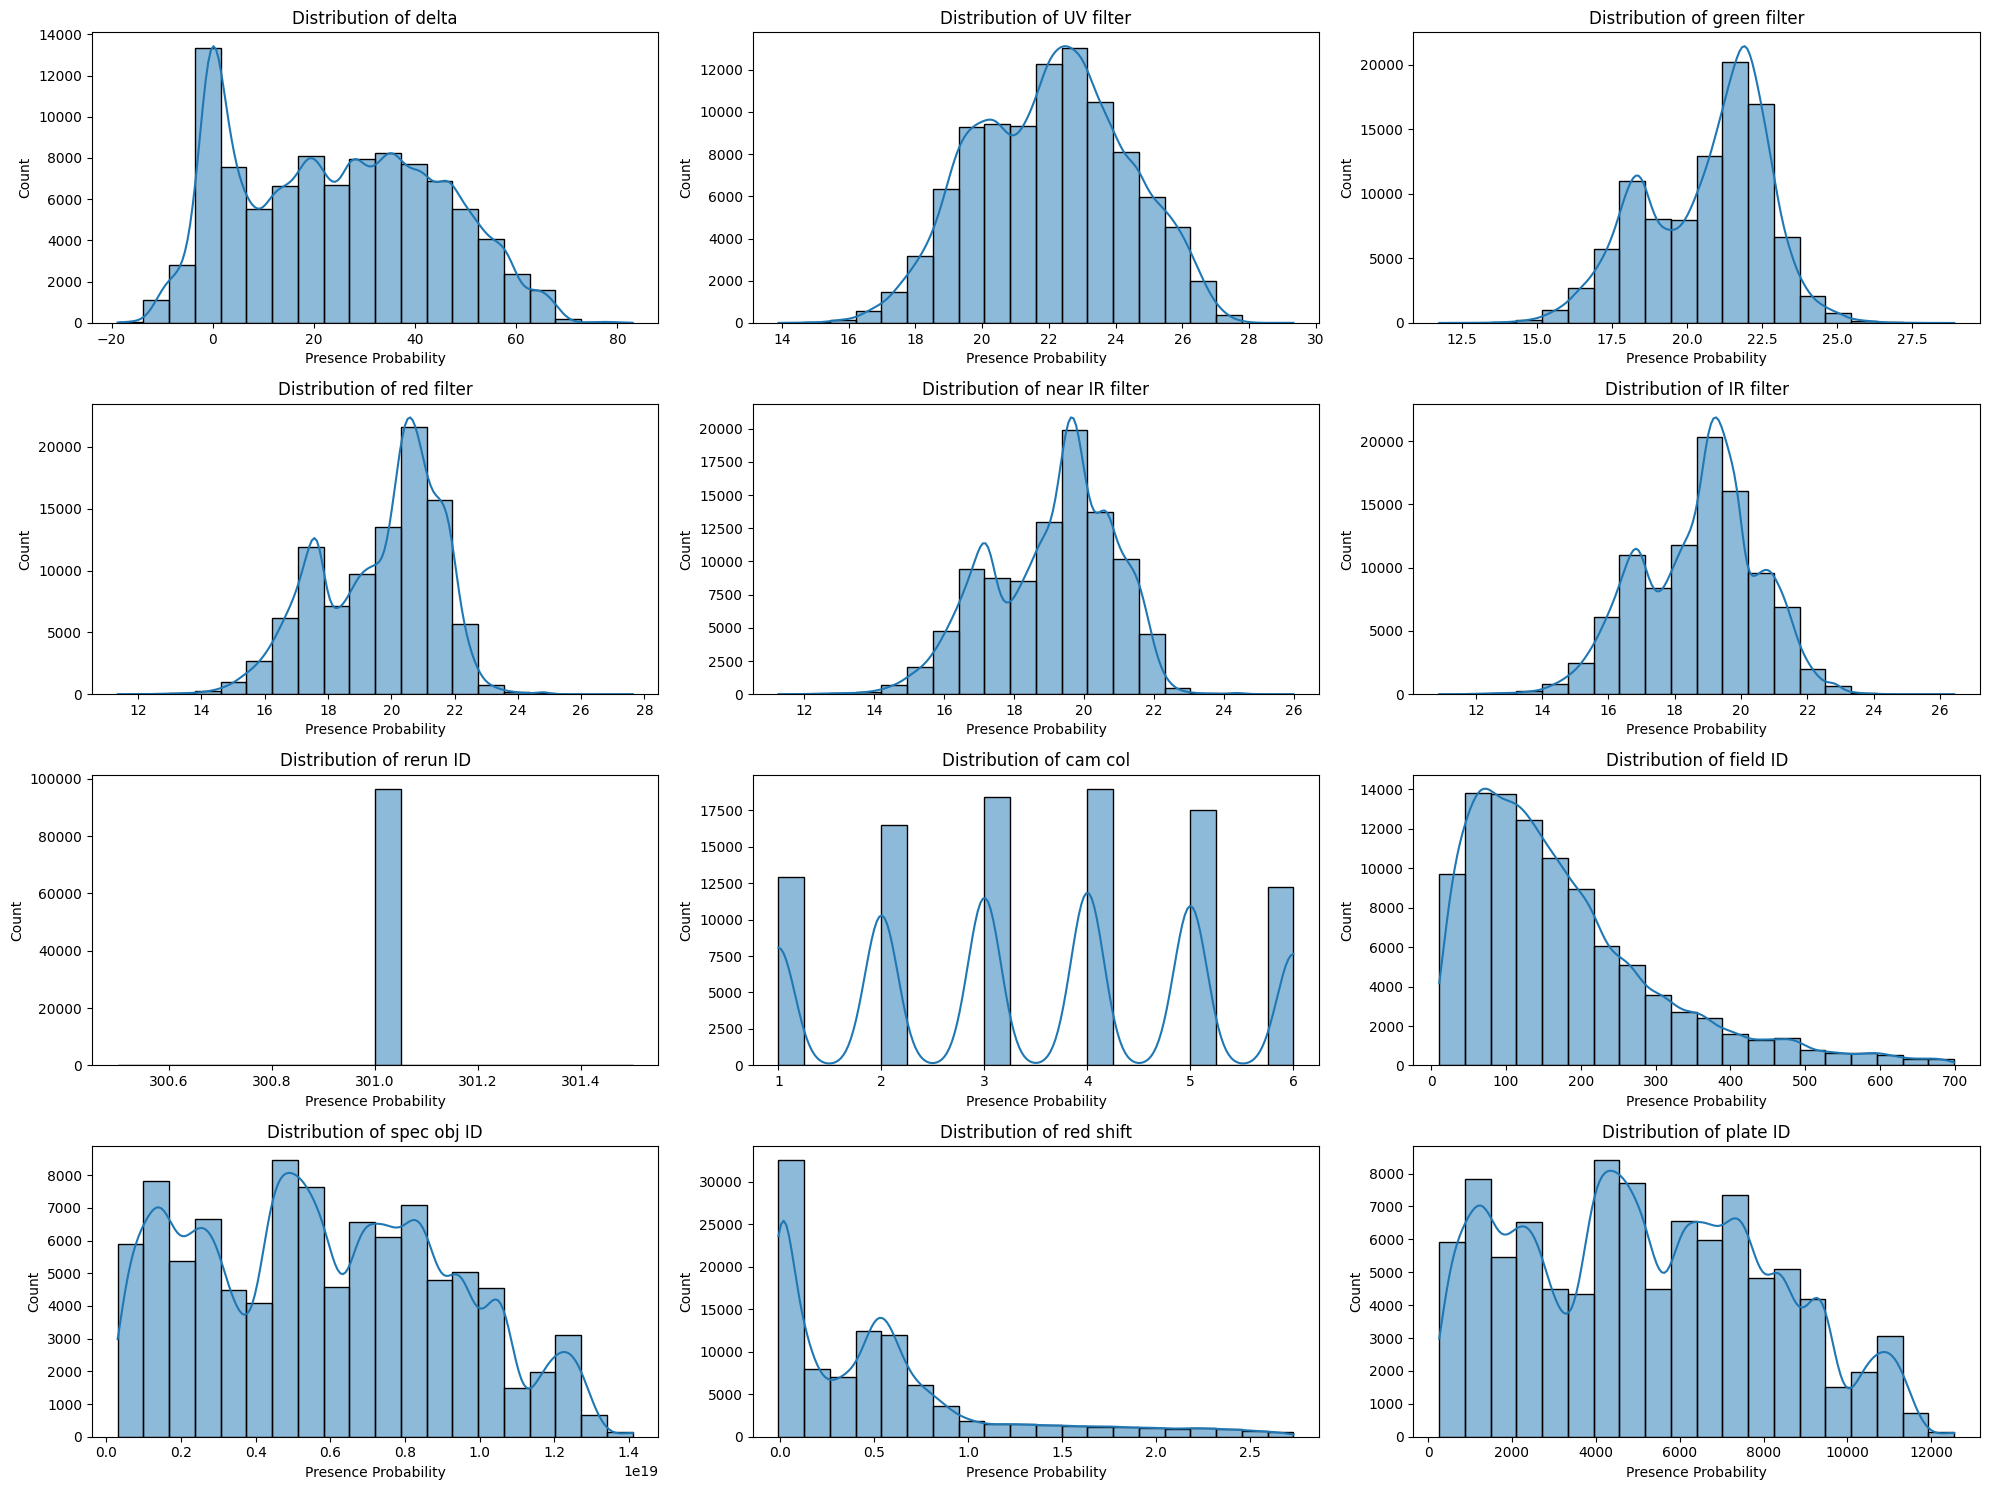

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create histograms with better formatting
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[1:-3], 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column.replace("_", " ")}')
    plt.xlabel('Presence Probability')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [17]:
# Standardizing the model to bring all the values with -1 to +1 range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = df.columns
df_scaled = pd.DataFrame(scaler.fit_transform(df[df.columns[:-1]]))
df = pd.concat([df_scaled, df['class']],axis=1, ignore_index=True)
df.columns = columns
df

alpha     delta  UV_filter  green_filter  red_filter  \
0     -0.450208  0.408320   0.803538      0.803510    0.408200   
1     -0.355192  0.346063   1.201309      1.074923    1.583491   
2     -0.382618  0.565834   1.416170      0.993004    0.523479   
3      1.661337 -1.269834   0.032576      1.535591    1.061279   
4      1.684777 -0.198982   0.630691      1.321612    0.905784   
...         ...       ...        ...           ...         ...   
96527 -1.449227 -1.381613   0.046194      1.145134    1.218251   
96528 -1.554537 -0.239312   0.277921      0.857629    0.437735   
96529  0.474249 -0.448366  -0.395684     -0.662021   -0.767788   
96530  0.346145  1.130937   1.454815      0.492525    0.149918   
96531  0.186285  1.273988   0.247175      0.570489    0.518857   

       near_IR_filter  IR_filter  rerun_ID   cam_col  field_ID  spec_obj_ID  \
0            0.057456   0.027299       0.0 -0.945734 -0.753457     0.218665   
1            1.197033   1.627574       0.0  0.944468 -0.445596     1.803311   
2            0.161512   0.114991       0.0 -0.945734 -0.437899    -0.200091   
3            0.819384   0.286237       0.0 -0.315667  0.285574     1.351416   
4            0.678023   0.453801       0.0 -0.315667 -0.514864    -0.046447   
...               ...        ...       ...       ...       ...          ...   
96527        1.275206   1.129103       0.0 -0.945734  3.110199     1.441795   
96528        0.394288   0.379942       0.0 -1.575802  0.862814     0.836255   
96529       -0.782201  -0.790551       0.0  0.314401  1.009048    -0.814668   
96530        0.004421  -0.068522       0.0  0.314401 -0.353237     0.538005   
96531        0.537704   0.303627       0.0  0.314401 -0.899691     0.760939   

       red_shift  plate_ID       MJD  fiber_ID  class  
0       0.189565  0.219844  0.414661 -1.016327      0  
1       0.433084  1.791331  1.416436 -0.078881      0  
2       0.205425 -0.199401 -0.008484 -0.547604      0  
3       0.691563  1.351735  1.350355  1.195461      0  
4       1.522142 -0.046763  0.137562  1.070957      1  
...          ...       ...       ...       ...    ...  
96527  -0.881392  1.428054  1.189315 -0.038600      0  
96528  -0.198296  0.835142  0.736739  1.528694      0  
96529  -0.639521 -0.814021 -0.595444 -1.371532      0  
96530  -0.113697  0.538347  0.422435  0.078581      0  
96531   0.034606  0.761876  0.831142  1.473766      0  

[96532 rows x 16 columns]

In [18]:
df['class'].unique()

array([0, 1, 2])

# Question 2: PCC and Scatter plot

In [19]:
from scipy import stats

# Calculate correlation between features and labels
print("\nCorrelation with Rock Category:")
correlations = []
for column in df.columns[:-1]:
    corr = stats.pearsonr(df[column], df['class'])[0]
    correlations.append((column, corr))
correlations.sort(key=lambda x: abs(x[1]), reverse=True)
print("\nFeature correlations with rock type (sorted by strength):")
for feature, corr in correlations:
    print(f"{feature.replace('_', ' ')}: {corr:.3f}")


Correlation with Rock Category:

Feature correlations with rock type (sorted by strength):
UV filter: -0.282
green filter: -0.236
rerun ID: nan
red shift: -0.114
red filter: -0.083
IR filter: 0.060
fiber ID: -0.047
field ID: -0.035
cam col: 0.021
spec obj ID: -0.017
plate ID: -0.017
delta: 0.014
alpha: -0.012
MJD: -0.008
near IR filter: 0.008


In [20]:
# dropping the below columns as the correlation with label is very low
df = df.drop(['MJD', 'plate_ID', 'spec_obj_ID', 'rerun_ID', 'fiber_ID', 'field_ID'],axis=1)
df.columns

Index(['alpha', 'delta', 'UV_filter', 'green_filter', 'red_filter',
       'near_IR_filter', 'IR_filter', 'cam_col', 'red_shift', 'class'],
      dtype='object')

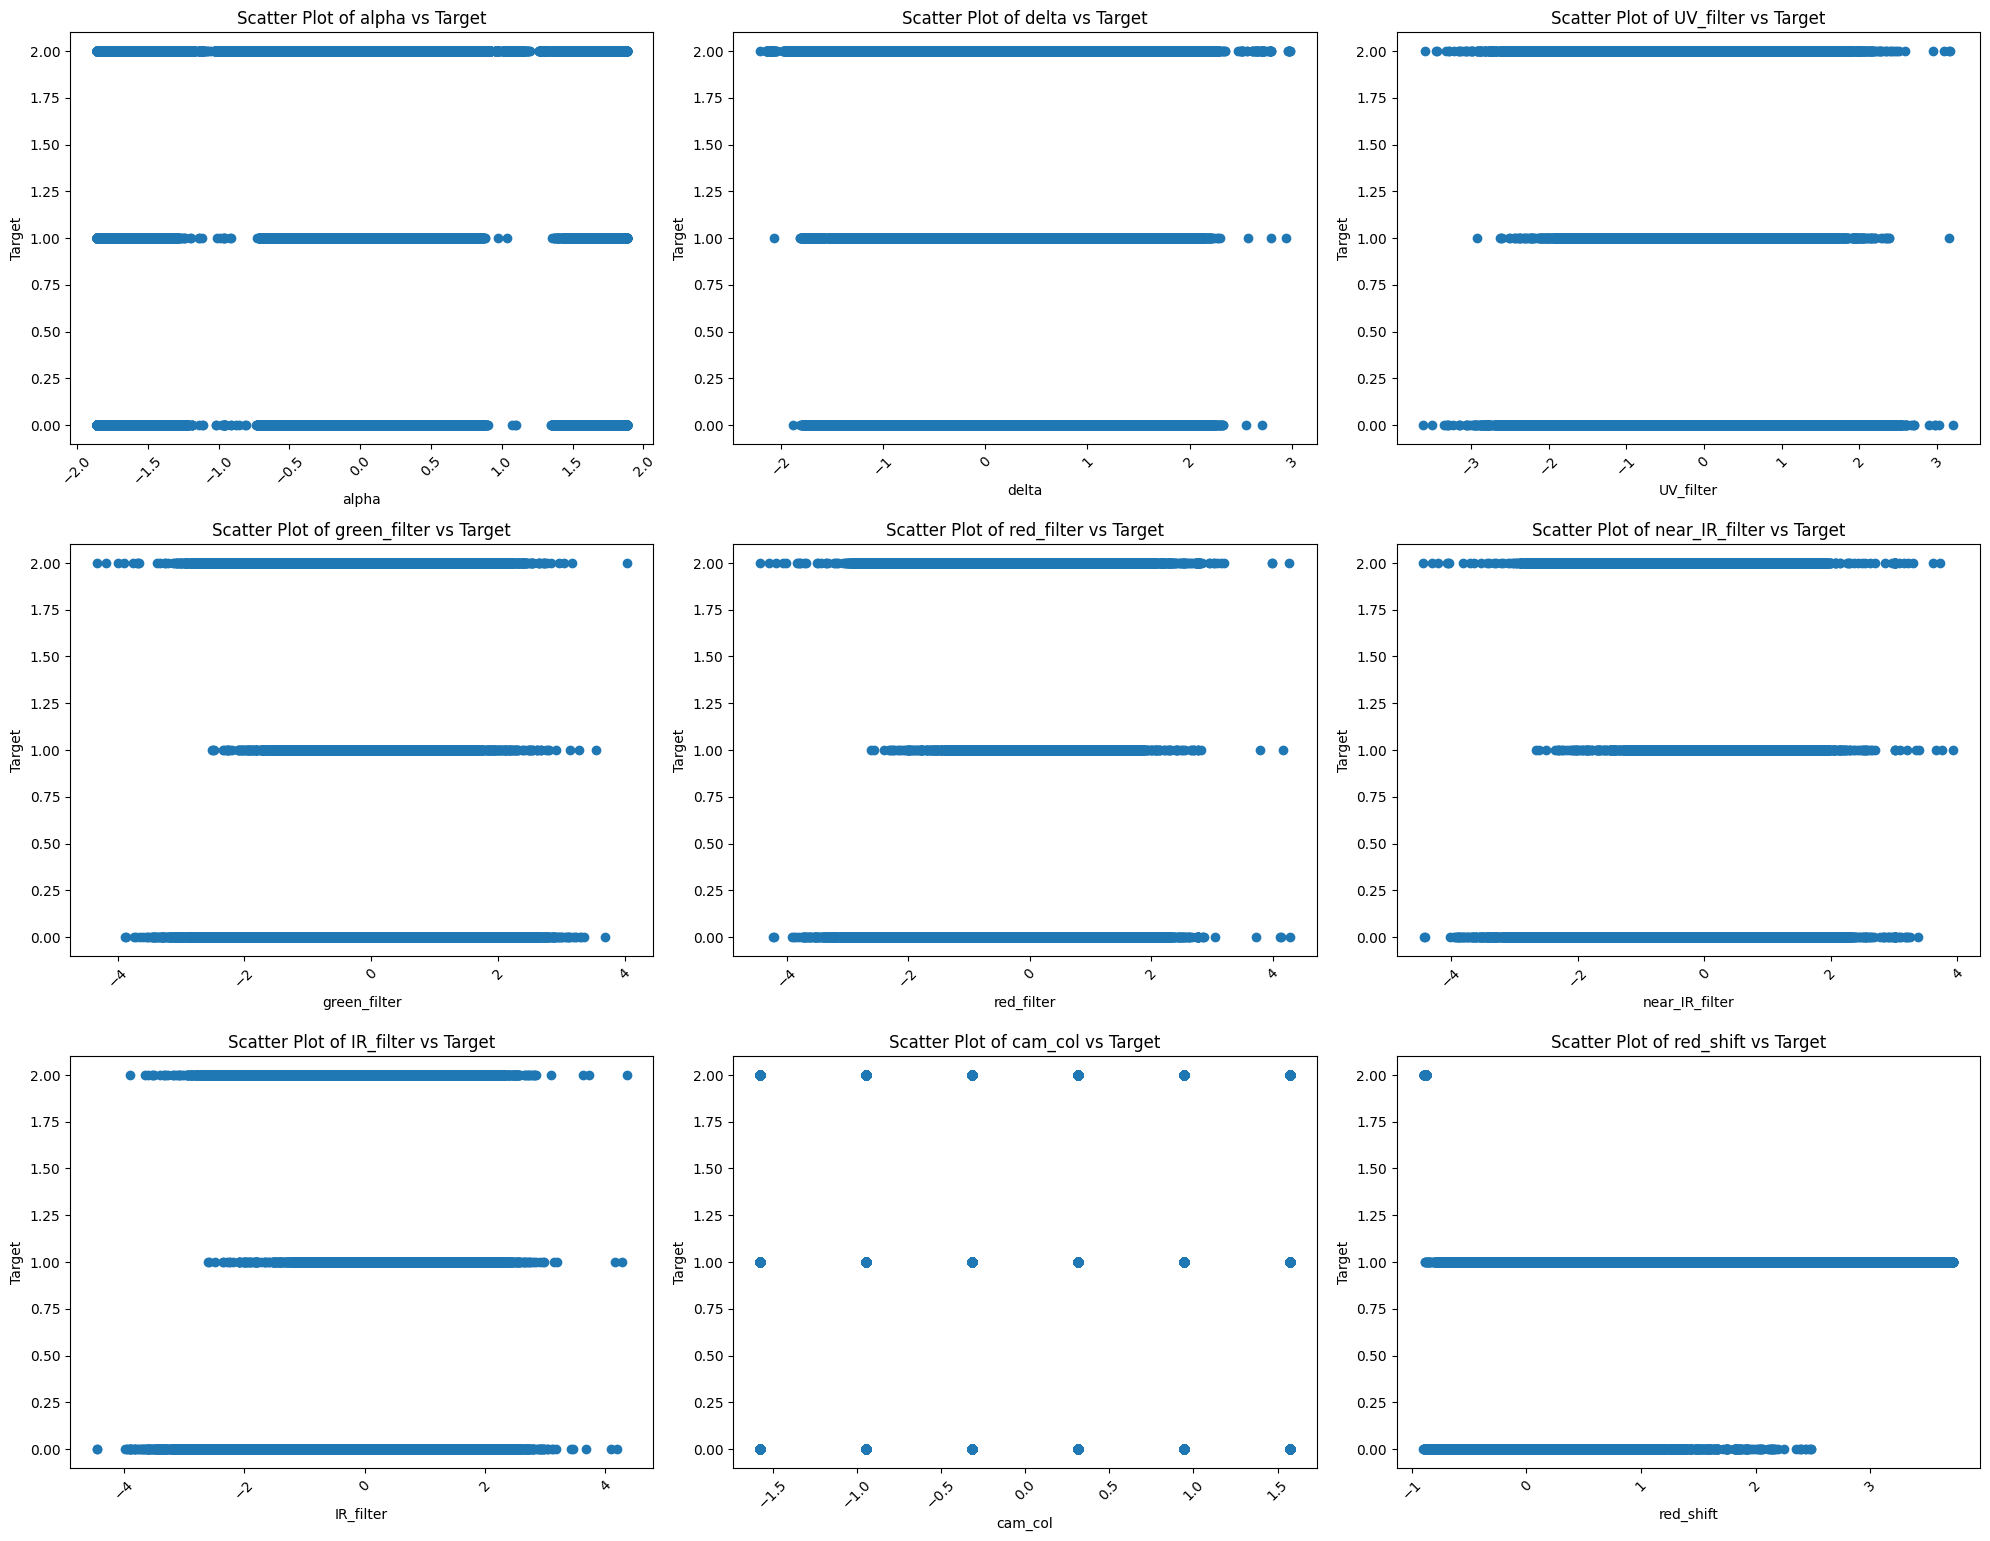

In [21]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 3, i)
    plt.scatter(df[col], df['class'])
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.title(f'Scatter Plot of {col} vs Target')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

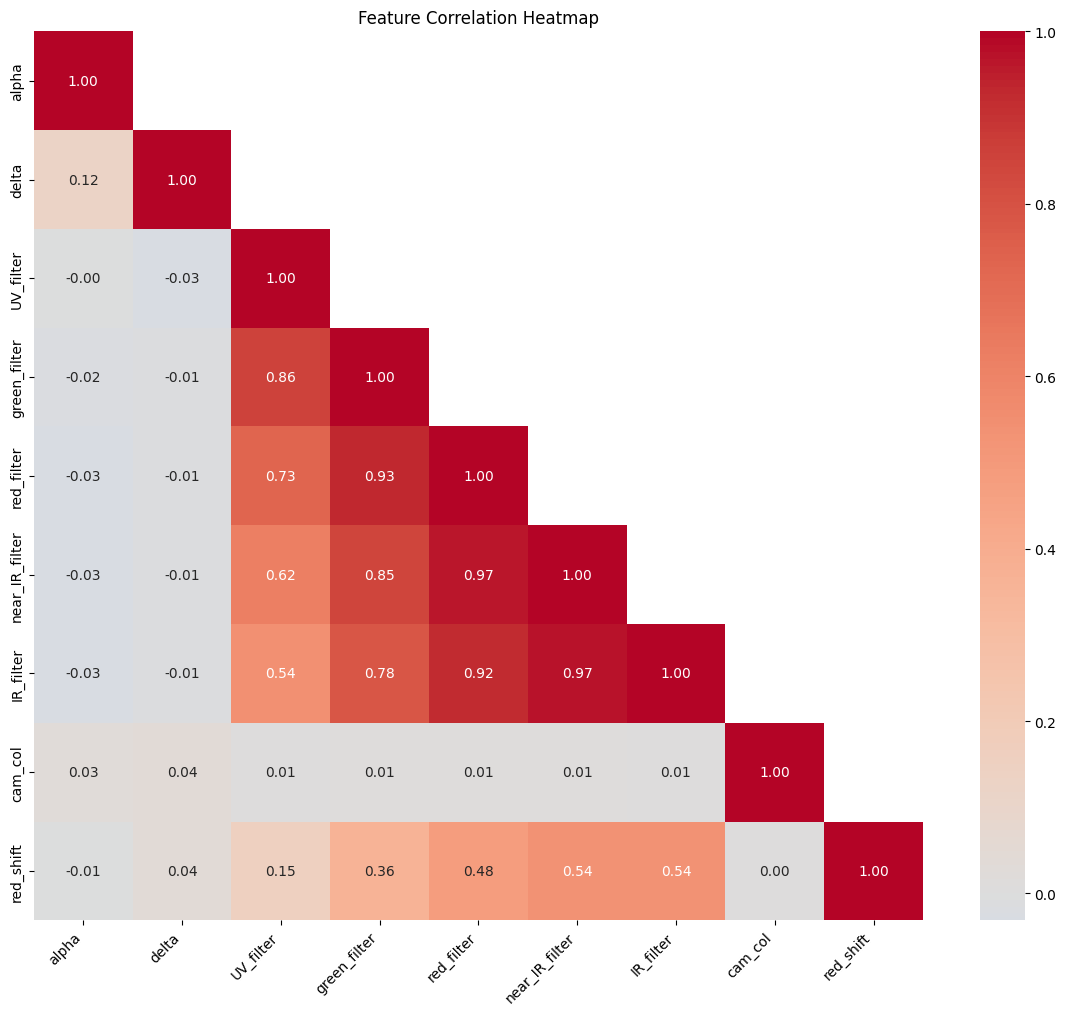

In [22]:
import numpy as np
columns_to_transform = df.columns[:-1]
# Create correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[columns_to_transform].corr()
mask = np.triu(np.ones_like(correlation_matrix), k=1)
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            xticklabels=columns_to_transform,
            yticklabels=columns_to_transform)
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

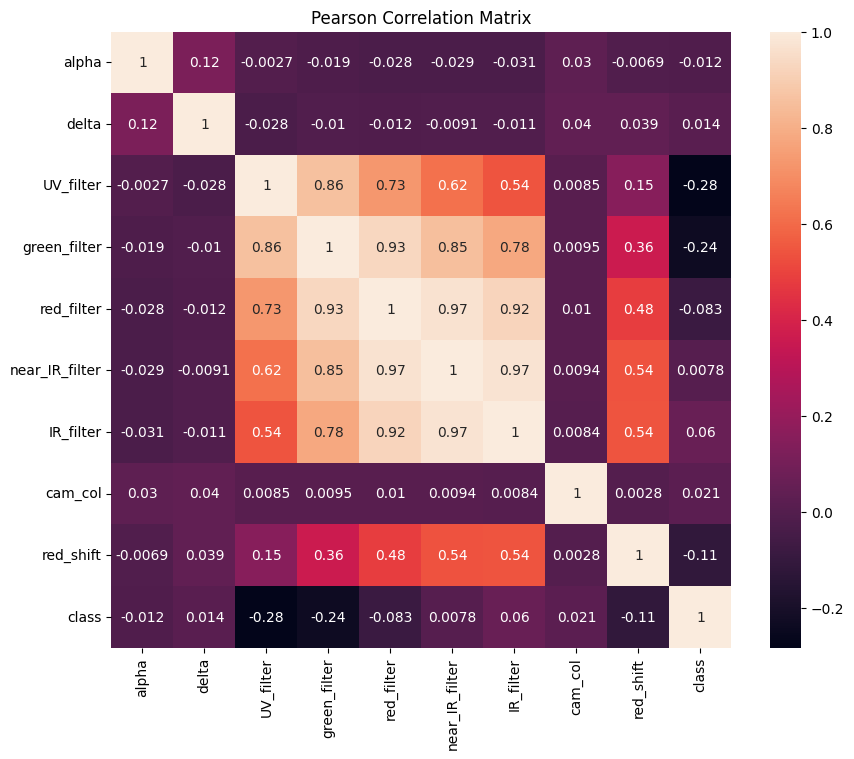

In [23]:
correlation_matrix = df.corr(method='pearson')

# Visualize the correlation matrix using a heatmap for better readability
import seaborn as sns
plt.subplots(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Pearson Correlation Matrix")
plt.show()

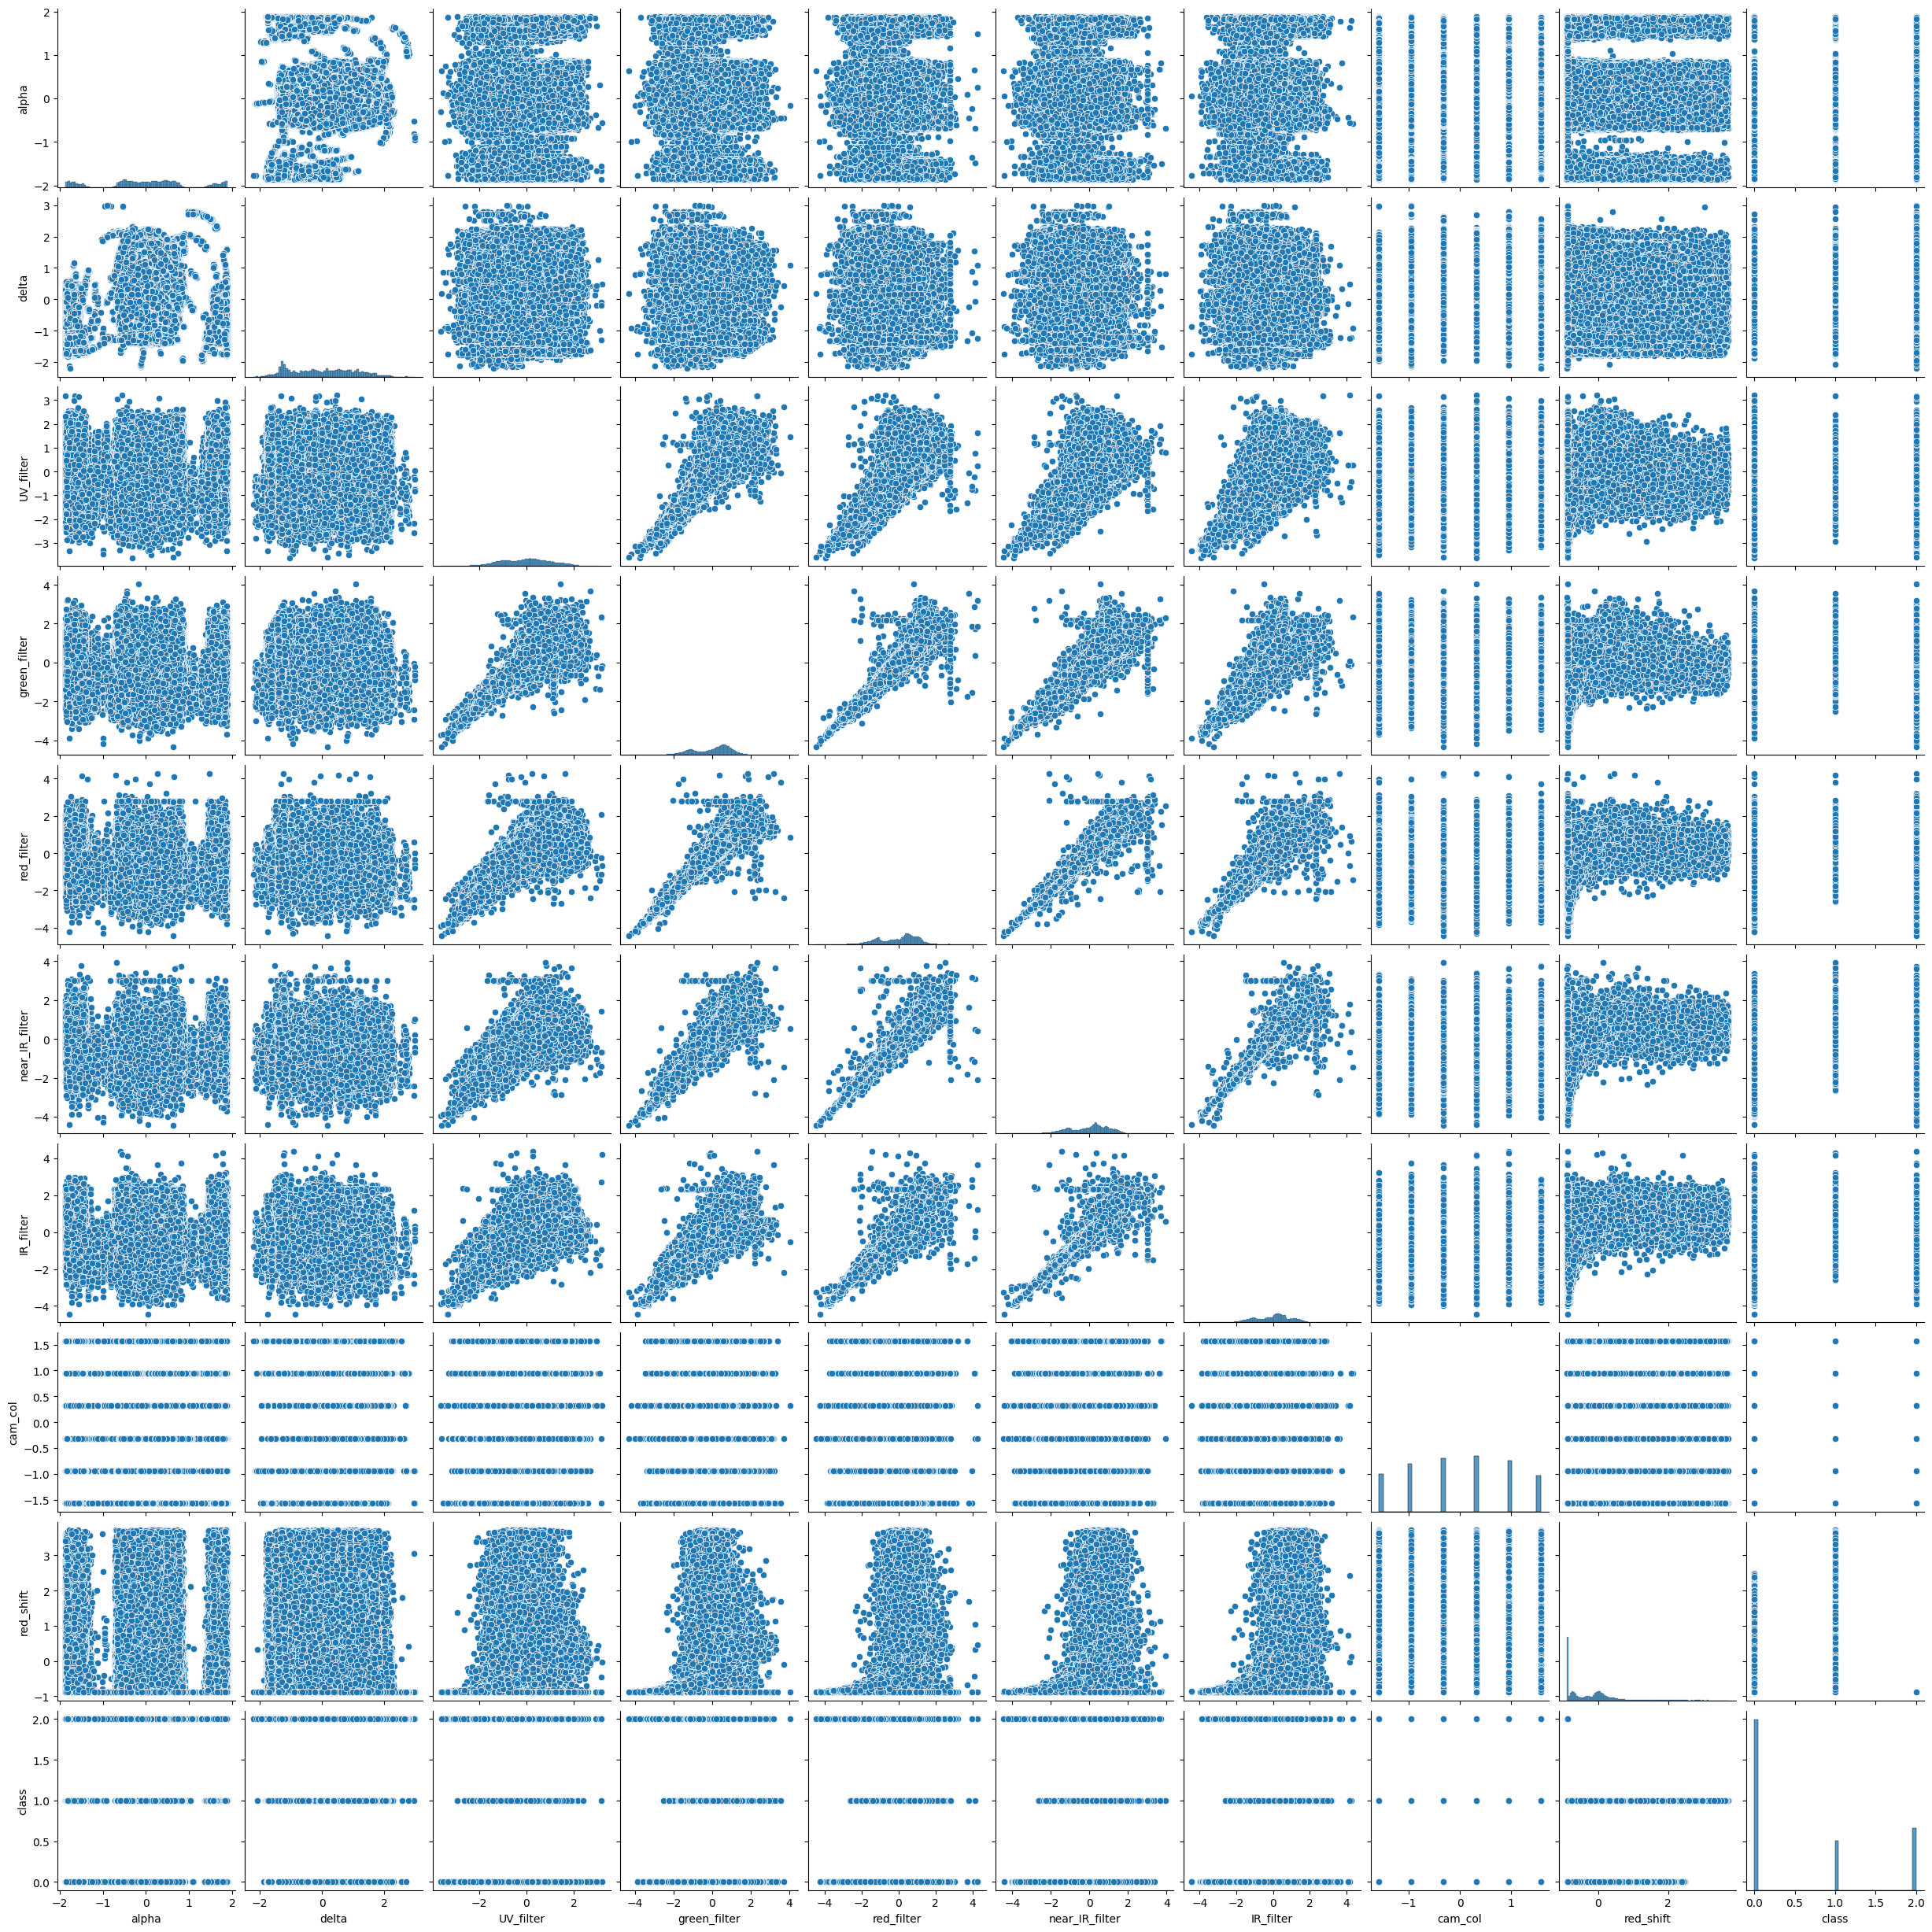

In [24]:
sns.pairplot(df)
plt.show()

# Question 3: Train, Val, Test Split

In [25]:
from sklearn.model_selection import train_test_split

y = df['class']
X = df.drop(['class'],axis=1)

# Assuming X is your feature matrix and y is your target variable
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [26]:
X_train.shape, X_test.shape, X_val.shape

((67572, 9), (14480, 9), (14480, 9))

In [27]:
X_train

alpha     delta  UV_filter  green_filter  red_filter  \
24169  0.769150  0.430892   1.489783      1.186057    0.998822   
46286 -0.315451  0.311681   0.700657      1.343352    1.776756   
3777   1.481797 -1.204289  -0.138178     -0.415751   -0.569536   
94155 -1.641377  0.151298   0.096196      0.710297    0.440103   
6913  -0.026250  1.416656   0.265489      1.180459    1.199576   
...         ...       ...        ...           ...         ...   
6265  -1.528475 -1.304633  -0.432586     -0.198949   -0.151888   
54886 -0.320917  1.612603  -0.731779     -1.017333   -1.130113   
76820 -0.236179 -1.319204  -0.385058     -0.238390    0.218054   
860   -0.528725  0.676397   0.551838      1.308090    1.151634   
15795  0.020946 -1.356798  -1.341410     -1.761829   -1.930716   

       near_IR_filter  IR_filter   cam_col  red_shift  
24169        0.482984   0.164867 -0.315667  -0.881515  
46286        1.498427   1.384937 -1.575802   0.459717  
3777        -0.557033  -0.564089  1.574535  -0.660230  
94155        0.178915   0.116074  1.574535   0.117847  
6913         0.877370   0.636043  0.314401   2.321323  
...               ...        ...       ...        ...  
6265         0.039182   0.093658 -1.575802  -0.323043  
54886       -1.108846  -1.089601 -0.945734  -0.684224  
76820        0.518286   0.673086  0.944468  -0.879753  
860          0.870074   0.672950 -0.315667   0.457145  
15795       -1.969697  -1.983342  0.314401  -0.713983  

[67572 rows x 9 columns]

In [28]:
X_test

alpha     delta  UV_filter  green_filter  red_filter  \
4269   1.490100 -1.203980   0.311038      0.829950    1.119614   
47123  0.674904  0.022520   1.143168      1.044406    0.574743   
39418  0.169506  1.297301   1.340162      0.705274    0.480132   
3344   0.068026 -0.848488  -0.908361     -0.589918   -0.235479   
88952  0.429658  0.826539   1.341751      0.737390    0.732252   
...         ...       ...        ...           ...         ...   
86157  0.719135  1.296915  -0.626044     -0.000283    0.405699   
54111  0.304461  0.334290  -0.076886      0.515103    1.019790   
93386  0.455035  1.246969   0.110686      0.719952    0.540823   
80638  0.148953  1.285824  -0.408267     -0.427664   -0.249935   
42458 -0.446566  1.663305  -0.259159     -0.196609   -0.553733   

       near_IR_filter  IR_filter   cam_col  red_shift  
4269         1.311919   1.040906  1.574535   0.423028  
47123        0.376413   0.195698 -0.315667  -0.001873  
39418        0.266524   0.215748  0.314401   0.026130  
3344        -0.021440   0.170496  0.314401   1.695096  
88952        0.510045   0.385826 -1.575802   0.133813  
...               ...        ...       ...        ...  
86157        0.807103   0.836588 -0.945734   0.943097  
54111        1.524663   1.378469  0.944468   2.856458  
93386        0.307238   0.095644  0.314401   0.049574  
80638       -0.070662   0.024031 -0.315667  -0.881837  
42458       -0.597434  -0.631605 -0.945734  -0.373767  

[14480 rows x 9 columns]

In [29]:
X_val

alpha     delta  UV_filter  green_filter  red_filter  \
22268  0.078722  1.735652   0.085778      0.421036    1.055729   
54216 -0.442620 -1.023490   0.673926      1.061849    0.685571   
86105  0.149599  1.182175  -2.250127     -2.347319   -2.301888   
33778 -0.217939 -1.346484  -1.677411     -1.611064   -1.386882   
13367  0.652717 -0.793989  -0.733465     -0.225706    0.231265   
...         ...       ...        ...           ...         ...   
6819  -1.597710  0.274304  -0.914305     -0.750675   -0.479821   
83687 -0.503887  1.007308  -1.079119     -0.732773   -0.321217   
25418  1.860152 -0.429021  -1.463343     -1.447767   -1.046555   
59693 -1.762240 -0.088045   1.255104      0.836616    0.477153   
593    1.707019  0.261924  -0.134380      0.361012    0.566305   

       near_IR_filter  IR_filter   cam_col  red_shift  
22268        1.258371   1.113375  1.574535   2.944836  
54216        0.382986   0.267196 -0.945734   0.168974  
86105       -2.213628  -2.064730  0.944468  -0.881626  
33778       -1.206972  -1.026046  0.314401  -0.879913  
13367        0.407976   0.570995 -1.575802   2.066530  
...               ...        ...       ...        ...  
6819        -0.257011  -0.106955 -1.575802  -0.881109  
83687       -0.042861   0.202602 -0.945734  -0.881734  
25418       -0.769174  -0.608729  1.574535  -0.883167  
59693        0.319314   0.310696  0.314401  -0.098657  
593          0.839229   0.707332  0.314401  -0.370184  

[14480 rows x 9 columns]

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [31]:
def get_accuracy(model, X, y):
    y_pred = model.predict(X)
    precision = precision_score(y, y_pred, average='micro')

    y_pred = model.predict(X)
    f1 = f1_score(y, y_pred, average='micro')

    y_pred = model.predict(X)
    recall = recall_score(y, y_pred, average='micro')

    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)

    print(f'accuracy: {accuracy} \n precision: {precision} \n f1: {f1} \n recall: {recall}')

# Question 4: Hyperparameter tuning on 3 models (SVC, Randomforest, Logistic regression)

In [32]:
models = {
    'SVC': SVC(probability=True),
    'RandomForest': RandomForestClassifier(),
    'LogisticReg': LogisticRegression(multi_class='multinomial')
}

params_grid = {
    'LogisticReg': {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["lbfgs", "saga", "sag"],
        "max_iter": [100, 200, 500]
    },
    'RandomForest': {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    'SVC':{
        "C": [0.1, 1, 10],
        "kernel": ["linear", "poly", "rbf"],
        "degree": [2, 3, 4],
        "gamma": ["scale", "auto"]
    }
}

In [33]:
from sklearn.model_selection import RandomizedSearchCV

results = {}


for model_name, model in models.items():
    grid_search = RandomizedSearchCV(model, params_grid[model_name],scoring='accuracy', n_iter=4, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    results[model_name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_score': grid_search.best_score_,
    }
    

In [34]:
importances = results['RandomForest']['best_estimator'].feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Feature Importances from Best Random Forest Model:")
print(feature_importances)

Feature Importances from Best Random Forest Model:
          Feature  Importance
8       red_shift    0.688240
6       IR_filter    0.089014
3    green_filter    0.062535
2       UV_filter    0.060383
5  near_IR_filter    0.044723
4      red_filter    0.037196
0           alpha    0.008263
1           delta    0.008130
7         cam_col    0.001516


In [35]:
for k, v in results.items():
    print(f'{k}\nbest_estimator : {v['best_estimator']}\nAccuracy: {v['best_score']}\n')

SVC
best_estimator : SVC(C=10, degree=4, kernel='linear', probability=True)
Accuracy: 0.9622624755816019

RandomForest
best_estimator : RandomForestClassifier(min_samples_split=10, n_estimators=200)
Accuracy: 0.9781270348665126

LogisticReg
best_estimator : LogisticRegression(C=1, multi_class='multinomial', solver='saga')
Accuracy: 0.9559284910909844



In the above model, RandomizedSearchCV efficiently explores a predefined set of hyperparameters for each model, using random sampling to identify the best combination while reducing computation time compared to exhaustive search methods like GridSearchCV.
1. Support Vector Classifier (SVC)
Best Hyperparameters: C=1, gamma='auto', and kernel='rbf'
Accuracy: 96.08%
Impact of Hyperparameters: The regularization parameter, 
𝐶
C, controls the trade-off between achieving a high accuracy on the training data and minimizing the prediction error for new data. A moderate value of 
C=1 balanced this well, preventing overfitting without underfitting. The rbf kernel allowed the model to capture non-linear relationships in the data, while gamma='auto' controlled the influence of single points in the decision boundary, achieving good generalization.
2. Random Forest Classifier
Best Hyperparameters: min_samples_leaf=2, min_samples_split=5, n_estimators=100, and max_depth=None
Accuracy: 97.79%
Impact of Hyperparameters: n_estimators, which controls the number of trees, was optimal at 100, striking a balance between computational efficiency and model performance. Lower min_samples_split and min_samples_leaf values (5 and 2, respectively) allowed the trees to grow deeper and capture more complex patterns. The max_depth=None setting avoided a hard limit on the depth, improving accuracy by allowing more detailed splits.
3. Logistic Regression
Best Hyperparameters: C=10, solver='newton-cg', and max_iter=500
Accuracy: 95.97%
Impact of Hyperparameters: With 
𝐶
=
10
C=10, the model applied strong regularization, controlling overfitting in high-dimensional space. The newton-cg solver effectively handled multi-class classification with the multi_class='multinomial' setting, while increasing max_iter to 500 allowed the model to converge on the optimal solution without prematurely stopping.
These insights on hyperparameter impacts show how each model’s performance was fine-tuned to reach optimal accuracy. Random Forest showed the best accuracy due to its robustness with large, high-variance data, followed by SVC, which captured non-linear patterns effectively.

In [36]:
print('SVC Train data accuracy:')
get_accuracy(results['SVC']['best_estimator'], X_train, y_train)
print('\n SVC Validation data accuracy:')
get_accuracy(results['SVC']['best_estimator'], X_val, y_val)
print('\n SVC Test data accuracy:')
get_accuracy(results['SVC']['best_estimator'], X_test, y_test)


print('\n\n Random Forest Train data accuracy:')
get_accuracy(results['RandomForest']['best_estimator'], X_train, y_train)
print('\n Random Forest Validation data accuracy:')
get_accuracy(results['RandomForest']['best_estimator'], X_val, y_val)
print('\n Random Forest Test data accuracy:')
get_accuracy(results['RandomForest']['best_estimator'], X_test, y_test)


print('\n\n LogisticReg Train data accuracy:')
get_accuracy(results['LogisticReg']['best_estimator'], X_train, y_train)
print('\n  LogisticReg Validation data accuracy:')
get_accuracy(results['LogisticReg']['best_estimator'], X_val, y_val)
print('\n LogisticReg Test data accuracy:')
get_accuracy(results['LogisticReg']['best_estimator'], X_test, y_test)

SVC Train data accuracy:
accuracy: 0.9623512697567039 
 precision: 0.9623512697567039 
 f1: 0.9623512697567039 
 recall: 0.9623512697567039

 SVC Validation data accuracy:
accuracy: 0.9595994475138122 
 precision: 0.9595994475138122 
 f1: 0.9595994475138122 
 recall: 0.9595994475138122

 SVC Test data accuracy:
accuracy: 0.9615331491712708 
 precision: 0.9615331491712708 
 f1: 0.9615331491712708 
 recall: 0.9615331491712708


 Random Forest Train data accuracy:
accuracy: 0.9897294737465222 
 precision: 0.9897294737465222 
 f1: 0.9897294737465222 
 recall: 0.9897294737465222

 Random Forest Validation data accuracy:
accuracy: 0.9777624309392265 
 precision: 0.9777624309392265 
 f1: 0.9777624309392265 
 recall: 0.9777624309392265

 Random Forest Test data accuracy:
accuracy: 0.9780386740331491 
 precision: 0.9780386740331491 
 f1: 0.9780386740331491 
 recall: 0.9780386740331491


 LogisticReg Train data accuracy:
accuracy: 0.9567868347836382 
 precision: 0.9567868347836382 
 f1: 0.956786

# Question 5: ensemble learning

To implement the ensemble classifier with optimal hyperparameters, the StackingClassifier was created using the best models for each algorithm: a Random Forest and an SVC as base models, and a Logistic Regression model as the meta-classifier. Each component model was configured with the best hyperparameters obtained from prior tuning, optimizing the ensemble’s predictive power on the dataset.

In [37]:
from sklearn.ensemble import StackingClassifier

# making use of best models from aabove runs
estimators = [
    ('dt', results['RandomForest']['best_estimator']),
    ('svc', results['SVC']['best_estimator'])
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=results['LogisticReg']['best_estimator'])


stacking_model.fit(X_train, y_train)


StackingClassifier(estimators=[('dt',
                                RandomForestClassifier(min_samples_split=10,
                                                       n_estimators=200)),
                               ('svc',
                                SVC(C=10, degree=4, kernel='linear',
                                    probability=True))],
                   final_estimator=LogisticRegression(C=1,
                                                      multi_class='multinomial',
                                                      solver='saga'))

In [38]:
print('Train data accuracy:')
get_accuracy(stacking_model, X_train, y_train)
print('\n\n Validation data accuracy:')
get_accuracy(stacking_model, X_val, y_val)

Train data accuracy:
accuracy: 0.9902030426804002 
 precision: 0.9902030426804002 
 f1: 0.9902030426804002 
 recall: 0.9902030426804002


 Validation data accuracy:
accuracy: 0.9780386740331491 
 precision: 0.9780386740331491 
 f1: 0.9780386740331491 
 recall: 0.9780386740331491


In [39]:

print('\n\n Test data accuracy:')
get_accuracy(stacking_model, X_test, y_test)



 Test data accuracy:
accuracy: 0.9777624309392265 
 precision: 0.9777624309392265 
 f1: 0.9777624309392265 
 recall: 0.9777624309392265


# Discussion on Findings

The ensemble model demonstrated only a slight improvement in accuracy (97.72% accuracy in test data), about 0.1-0.2% higher than the best-performing base models, namely SVC and Logistic Regression. However, the ensemble's accuracy was nearly identical to that of the Random Forest model, showing minimal benefit over this single model. While the ensemble theoretically provides greater robustness by averaging out individual model errors, in this case, the gains were marginal and did not substantially outperform the strongest individual classifiers.

This finding suggests that the diversity among the base models in this ensemble may not have been sufficient to leverage the full benefits of ensembling. The results highlight that, in cases where base models already perform well, adding an ensemble approach may not always provide a significant accuracy boost.